In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Dropout
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
# this csv contains all the data from canadian weather stations from 1917-2017
df = pd.read_csv('./data/canada_all_df.csv')

In [3]:
# the csv was saved with an index droping the index column
df.drop(columns='Unnamed: 0', inplace = True)


In [4]:
# makes a new column that called decade. The value reflects how many decades the after 1910 the data was recorded  

dec ={'1910':0, '1920':1, '1930':2, '1940':3, '1950':4, '1960':5, '1970':6, '1980':7,
       '1990':8, '2000':9, '2010':10}
df['decade'] = df['Year']//10 *10
df['decade'] = df['decade'].astype(str)
df['decade']=   df['decade'].map(dec)

In [5]:
# shows the baseline of each decade
df['decade'].value_counts(normalize=True)

7     0.154093
6     0.148514
8     0.147100
9     0.127120
5     0.113677
10    0.081037
4     0.077267
3     0.055187
2     0.046639
1     0.039295
0     0.010070
Name: decade, dtype: float64

In [100]:
# Makes the dataframe contain only stations with more than 30 years worth of observations



# https://stackoverflow.com/questions/29836836/how-do-i-filter-a-pandas-dataframe-based-on-value-counts


df = df.groupby("Clim_ID").filter(lambda x: len(x) > 360)

In [7]:
# shows the baseline of each decade
df['decade'].value_counts(normalize=True)

7     0.148362
6     0.145253
8     0.131075
5     0.123600
9     0.099980
4     0.098478
3     0.079141
2     0.063546
1     0.049516
10    0.049088
0     0.011960
Name: decade, dtype: float64

In [101]:
# sets the features for the model to be all numerical values in our dataset, and sets out target to what decade the data came from

X= df.drop(columns= ['Stn_Name', 'Prov', 'Clim_ID', 'decade', 'Year'])
y = df['decade']

X_train, X_test,y_train,y_test = train_test_split(X,y, stratify=y)

In [102]:
# scales the data
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [10]:
# did a quick randomforest model with max depth of 10
rf =RandomForestClassifier(max_depth=10)
rf.fit(X_train_sc,y_train)
rf.score(X_train_sc,y_train), rf.score(X_test_sc,y_test)

(0.2388341578227841, 0.22741238372639294)

In [23]:
# made a random forest model with a max depth of 100
# the score 
rf =RandomForestClassifier(max_depth=100)
rf.fit(X_train_sc,y_train)
rf.score(X_train_sc,y_train), rf.score(X_test_sc,y_test)

(0.9999874721450976, 0.41590247110777034)

In [5]:
# sets X and y and transform y into an arry to show which decade its in.

X= df.drop(columns= ['Stn_Name', 'Prov', 'Clim_ID', 'decade', 'Year'])
y = df['decade']

y = to_categorical(y)

# splits X and y into train and test
X_train, X_test,y_train,y_test = train_test_split(X,y, stratify=y)


# scales X and y
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [71]:
# creates a neural nets  model
nn= Sequential()

#  2 hidden layers
nn.add(Dense(32, input_dim=X_train_sc.shape[1], activation='relu'))
nn.add(Dense(32, activation='relu'))

# output layer
nn.add(Dense(11, activation='softmax'))

# compiles model
nn.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

In [72]:
# fits our model
results = nn.fit(X_train_sc, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_sc,y_test))

Epoch 1/10
19956/19956 [==============================] - 10s 488us/step - loss: 2.1940 - acc: 0.1813 - val_loss: 2.1487 - val_acc: 0.1986
Epoch 2/10
19956/19956 [==============================] - 10s 485us/step - loss: 2.1446 - acc: 0.2018 - val_loss: 2.1402 - val_acc: 0.1995
Epoch 3/10
19956/19956 [==============================] - 10s 494us/step - loss: 2.1330 - acc: 0.2063 - val_loss: 2.1291 - val_acc: 0.2075
Epoch 4/10
19956/19956 [==============================] - 10s 496us/step - loss: 2.1261 - acc: 0.2098 - val_loss: 2.1246 - val_acc: 0.2091
Epoch 5/10
19956/19956 [==============================] - 10s 494us/step - loss: 2.1204 - acc: 0.2126 - val_loss: 2.1223 - val_acc: 0.2116
Epoch 6/10
19956/19956 [==============================] - 10s 493us/step - loss: 2.1166 - acc: 0.2139 - val_loss: 2.1218 - val_acc: 0.2096
Epoch 7/10
19956/19956 [==============================] - 10s 492us/step - loss: 2.1129 - acc: 0.2148 - val_loss: 2.1188 - val_acc: 0.2116
Epoch 8/10
19956/19956 [===

In [79]:
# let's create our model
nn= Sequential()
# hidden layers
nn.add(Dense(512, input_dim=X_train_sc.shape[1], activation='relu'))
nn.add(Dense(512, activation='relu'))
nn.add(Dense(512, activation='relu'))

# output layer
nn.add(Dense(11, activation='softmax'))


#compiles model
nn.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

results = nn.fit(X_train_sc, y_train,
                    batch_size=256,
                    epochs=16,
                    validation_data=(X_test_sc,y_test))

Epoch 1/16
2495/2495 [==============================] - 16s 6ms/step - loss: 2.1677 - acc: 0.1934 - val_loss: 2.0992 - val_acc: 0.2239
Epoch 2/16
2495/2495 [==============================] - 14s 6ms/step - loss: 2.0739 - acc: 0.2360 - val_loss: 2.0259 - val_acc: 0.2594
Epoch 3/16
2495/2495 [==============================] - 15s 6ms/step - loss: 2.0070 - acc: 0.2666 - val_loss: 1.9757 - val_acc: 0.2813
Epoch 4/16
2495/2495 [==============================] - 14s 6ms/step - loss: 1.9488 - acc: 0.2922 - val_loss: 1.9406 - val_acc: 0.2964
Epoch 5/16
2495/2495 [==============================] - 14s 6ms/step - loss: 1.8975 - acc: 0.3139 - val_loss: 1.9050 - val_acc: 0.3123
Epoch 6/16
2495/2495 [==============================] - 14s 6ms/step - loss: 1.8583 - acc: 0.3277 - val_loss: 1.8764 - val_acc: 0.3245
Epoch 7/16
2495/2495 [==============================] - 15s 6ms/step - loss: 1.8244 - acc: 0.3425 - val_loss: 1.8574 - val_acc: 0.3316
Epoch 8/16
2495/2495 [==============================] -

In [80]:
# let's create our model
nn= Sequential()
# hidden layers
nn.add(Dense(512, input_dim=X_train_sc.shape[1], activation='relu'))
nn.add(Dense(512, activation='relu'))
nn.add(Dense(512, activation='relu'))
nn.add(Dense(512, activation='relu'))

# output layer
nn.add(Dense(11, activation='softmax'))

# compiles model
nn.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

results = nn.fit(X_train_sc, y_train,
                    batch_size=256,
                    epochs=16,
                    validation_data=(X_test_sc,y_test))

Epoch 1/16
2495/2495 [==============================] - 20s 8ms/step - loss: 2.1690 - acc: 0.1918 - val_loss: 2.0881 - val_acc: 0.2283
Epoch 2/16
2495/2495 [==============================] - 20s 8ms/step - loss: 2.0690 - acc: 0.2366 - val_loss: 2.0218 - val_acc: 0.2578
Epoch 3/16
2495/2495 [==============================] - 18s 7ms/step - loss: 1.9864 - acc: 0.2749 - val_loss: 1.9509 - val_acc: 0.2909
Epoch 4/16
2495/2495 [==============================] - 18s 7ms/step - loss: 1.9109 - acc: 0.3063 - val_loss: 1.9001 - val_acc: 0.3123
Epoch 5/16
2495/2495 [==============================] - 18s 7ms/step - loss: 1.8513 - acc: 0.3306 - val_loss: 1.8656 - val_acc: 0.3278
Epoch 6/16
2495/2495 [==============================] - 19s 8ms/step - loss: 1.8015 - acc: 0.3509 - val_loss: 1.8297 - val_acc: 0.3402
Epoch 7/16
2495/2495 [==============================] - 20s 8ms/step - loss: 1.7594 - acc: 0.3657 - val_loss: 1.8211 - val_acc: 0.3470
Epoch 8/16
2495/2495 [==============================] -

In [86]:
# transform the data with PCA
pca=PCA()
pca.fit(X_train_sc)
Z_train =pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

In [123]:
# transform the data with PCA

pca=PCA(n_components=10)
pca.fit(X_train_sc)
Z_train =pca.transform(X_train_sc)
Z_test = pca.transform(X_test_sc)
var_exp =pca.explained_variance_ratio_
print(f'Explained variance for each component): {var_exp}')

Explained variance for each component): [0.29250123 0.24555788 0.13175641 0.08162141 0.05747355 0.05360277
 0.04149689 0.03025271 0.02440467 0.01465115]


In [90]:
# Makes a neural net model with the PCA transformed data
nn= Sequential()
# hidden layers
nn.add(Dense(512, input_dim=Z_train.shape[1], activation='relu'))
nn.add(Dense(512, activation='relu'))
nn.add(Dense(512, activation='relu'))


# output layer
nn.add(Dense(11, activation='softmax'))

# compiles model
nn.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

results1 = nn.fit(Z_train, y_train,
                    batch_size=256,
                    epochs=25,
                    validation_data=(Z_test,y_test))

Epoch 1/25
2495/2495 [==============================] - 14s 5ms/step - loss: 2.1823 - acc: 0.1870 - val_loss: 2.1321 - val_acc: 0.2078
Epoch 2/25
2495/2495 [==============================] - 13s 5ms/step - loss: 2.1191 - acc: 0.2133 - val_loss: 2.0980 - val_acc: 0.2241
Epoch 3/25
2495/2495 [==============================] - 13s 5ms/step - loss: 2.0824 - acc: 0.2306 - val_loss: 2.0716 - val_acc: 0.2362
Epoch 4/25
2495/2495 [==============================] - 13s 5ms/step - loss: 2.0497 - acc: 0.2455 - val_loss: 2.0440 - val_acc: 0.2487
Epoch 5/25
2495/2495 [==============================] - 13s 5ms/step - loss: 2.0237 - acc: 0.2578 - val_loss: 2.0259 - val_acc: 0.2571
Epoch 6/25
2495/2495 [==============================] - 13s 5ms/step - loss: 2.0012 - acc: 0.2663 - val_loss: 2.0162 - val_acc: 0.2626
Epoch 7/25
2495/2495 [==============================] - 13s 5ms/step - loss: 1.9810 - acc: 0.2748 - val_loss: 2.0026 - val_acc: 0.2670
Epoch 8/25
2495/2495 [==============================] -

In [99]:
# just using features that record temp
X= df[['Tx','Tn','Tm']]
y = df['decade']

y = to_categorical(y)
X_train_t, X_test_t,y_train_t,y_test_t = train_test_split(X,y, stratify=y)

sc_t = StandardScaler()

X_train_t_sc = sc_t.fit_transform(X_train_t)
X_test_t_sc = sc_t.transform(X_test_t)

In [100]:
# creates a model that uses features that record temp
nn_t= Sequential()
# 1st hidden layer
nn_t.add(Dense(512, input_dim=X_train_t_sc.shape[1], activation='relu'))
nn_t.add(Dense(512, activation='relu'))
nn_t.add(Dense(512, activation='relu'))

# output layer
nn_t.add(Dense(11, activation='softmax'))

nn_t.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

results_t = nn_t.fit(X_train_t_sc, y_train_t,
                    batch_size=256,
                    epochs=16,
                    validation_data=(X_test_t_sc,y_test_t))

Epoch 1/16
2495/2495 [==============================] - 13s 5ms/step - loss: 2.2667 - acc: 0.1505 - val_loss: 2.2582 - val_acc: 0.1565
Epoch 2/16
2495/2495 [==============================] - 13s 5ms/step - loss: 2.2564 - acc: 0.1567 - val_loss: 2.2532 - val_acc: 0.1616
Epoch 3/16
2495/2495 [==============================] - 13s 5ms/step - loss: 2.2525 - acc: 0.1604 - val_loss: 2.2501 - val_acc: 0.1631
Epoch 4/16
2495/2495 [==============================] - 13s 5ms/step - loss: 2.2498 - acc: 0.1624 - val_loss: 2.2490 - val_acc: 0.1647
Epoch 5/16
2495/2495 [==============================] - 13s 5ms/step - loss: 2.2480 - acc: 0.1643 - val_loss: 2.2478 - val_acc: 0.1655
Epoch 6/16
2495/2495 [==============================] - 13s 5ms/step - loss: 2.2461 - acc: 0.1656 - val_loss: 2.2459 - val_acc: 0.1663
Epoch 7/16
2495/2495 [==============================] - 13s 5ms/step - loss: 2.2439 - acc: 0.1665 - val_loss: 2.2451 - val_acc: 0.1663
Epoch 8/16
2495/2495 [==============================] -

In [101]:
# create a model using dropout
nn_dropout= Sequential()
# hidden layer
nn_dropout.add(Dense(1024, input_dim=X_train_sc.shape[1], activation='relu'))

nn_dropout.add(Dropout(.5))

nn_dropout.add(Dense(1024, activation='relu'))

nn_dropout.add(Dropout(.5))

nn_dropout.add(Dense(1024, activation='relu'))

nn_dropout.add(Dropout(.5))
# output layer
nn_dropout.add(Dense(11, activation='softmax'))

nn_dropout.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

results1 = nn_dropout.fit(X_train_sc, y_train,
                    batch_size=256,
                    epochs=16,
                    validation_data=(X_test_sc,y_test))

Epoch 1/16
2495/2495 [==============================] - 44s 18ms/step - loss: 2.2083 - acc: 0.1770 - val_loss: 2.1458 - val_acc: 0.2004
Epoch 2/16
2495/2495 [==============================] - 44s 18ms/step - loss: 2.1574 - acc: 0.1974 - val_loss: 2.1285 - val_acc: 0.2085
Epoch 3/16
2495/2495 [==============================] - 44s 18ms/step - loss: 2.1448 - acc: 0.2017 - val_loss: 2.1133 - val_acc: 0.2182
Epoch 4/16
2495/2495 [==============================] - 43s 17ms/step - loss: 2.1347 - acc: 0.2061 - val_loss: 2.1070 - val_acc: 0.2205
Epoch 5/16
2495/2495 [==============================] - 43s 17ms/step - loss: 2.1264 - acc: 0.2106 - val_loss: 2.0936 - val_acc: 0.2265
Epoch 6/16
2495/2495 [==============================] - 43s 17ms/step - loss: 2.1222 - acc: 0.2115 - val_loss: 2.0906 - val_acc: 0.2288
Epoch 7/16
2495/2495 [==============================] - 43s 17ms/step - loss: 2.1163 - acc: 0.2149 - val_loss: 2.0802 - val_acc: 0.2327
Epoch 8/16
2495/2495 [==========================

In [6]:
# creates our model using the origonal features (lacks 'lxL')
nn= Sequential()
# hidden layers
nn.add(Dense(512, input_dim=X_train_sc.shape[1], activation='relu'))
nn.add(Dense(512, activation='relu'))
nn.add(Dense(512, activation='relu'))

# output layer
nn.add(Dense(11, activation='softmax'))


#compiles model
nn.compile(loss ='categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

results = nn.fit(X_train_sc, y_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(X_test_sc,y_test))

Epoch 1/30
4459/4459 [==============================] - 23s 5ms/step - loss: 2.0657 - acc: 0.2305 - val_loss: 1.9568 - val_acc: 0.2762
Epoch 2/30
4459/4459 [==============================] - 21s 5ms/step - loss: 1.9400 - acc: 0.2841 - val_loss: 1.8896 - val_acc: 0.3087
Epoch 3/30
4459/4459 [==============================] - 22s 5ms/step - loss: 1.8582 - acc: 0.3228 - val_loss: 1.8240 - val_acc: 0.3375
Epoch 4/30
4459/4459 [==============================] - 22s 5ms/step - loss: 1.7979 - acc: 0.3484 - val_loss: 1.7869 - val_acc: 0.3540
Epoch 5/30
4459/4459 [==============================] - 22s 5ms/step - loss: 1.7511 - acc: 0.3670 - val_loss: 1.7623 - val_acc: 0.3646
Epoch 6/30
4459/4459 [==============================] - 22s 5ms/step - loss: 1.7192 - acc: 0.3799 - val_loss: 1.7335 - val_acc: 0.3755
Epoch 7/30
4459/4459 [==============================] - 22s 5ms/step - loss: 1.6903 - acc: 0.3910 - val_loss: 1.7224 - val_acc: 0.3804
Epoch 8/30
4459/4459 [==============================] -

In [7]:
# makes predictions on test data
preds = nn.predict_classes(X_test_sc)

preds

C:\Users\nicrs\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 3, 9, ..., 7, 5, 9], dtype=int64)

In [8]:
# puts those predictions in a confution matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), preds)

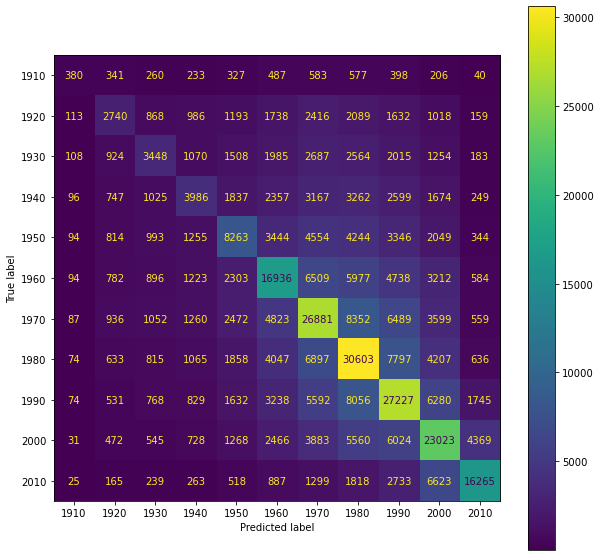

In [9]:
# displays the confution matrix
labels = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
fig, ax = plt.subplots(figsize=(10,10))

ConfusionMatrixDisplay(cm, display_labels=labels).plot(ax=ax)
plt.savefig('./images/confutionmatrix.jpg')

In [10]:
# show a clasification report for the predictions
print(classification_report(np.argmax(y_test, axis=1), preds))

              precision    recall  f1-score   support

           0       0.32      0.10      0.15      3832
           1       0.30      0.18      0.23     14952
           2       0.32      0.19      0.24     17746
           3       0.31      0.19      0.24     20999
           4       0.36      0.28      0.31     29400
           5       0.40      0.39      0.40     43254
           6       0.42      0.48      0.44     56510
           7       0.42      0.52      0.46     58632
           8       0.42      0.49      0.45     55972
           9       0.43      0.48      0.45     48369
          10       0.65      0.53      0.58     30835

    accuracy                           0.42    380501
   macro avg       0.39      0.35      0.36    380501
weighted avg       0.42      0.42      0.41    380501



In [11]:
# data from Trevors dataset
world = pd.read_csv('./data/for_nic.csv')

world.head()

,country,year,month,lat,lon,TAVG,TMAX,TMIN,PRCP,SNOW,SNWD
0,American Samoa [United States],1970,1,-14.3306,-170.7136,27.170968,30.761290,23.580645,7.732258,0.0,0.0
1,American Samoa [United States],1970,2,-14.3306,-170.7136,27.605357,30.796429,24.414286,8.053571,0.0,0.0
2,American Samoa [United States],1970,3,-14.3306,-170.7136,26.711290,30.232258,23.190323,17.716129,0.0,0.0
3,American Samoa [United States],1970,4,-14.3306,-170.7136,27.213333,30.396667,24.030000,11.496667,0.0,0.0
4,American Samoa [United States],1970,5,-14.3306,-170.7136,27.341935,30.319355,24.364516,7.193548,0.0,0.0


In [12]:
# makes a new column that called decade. The value reflects how many decades the after 1910 the data was recorded  

dec ={'1910':0, '1920':1, '1930':2, '1940':3, '1950':4, '1960':5, '1970':6, '1980':7,
       '1990':8, '2000':9, '2010':10}
world['decade'] = world['year']//10 *10
world['decade'] = world['decade'].astype(str)
world['decade']=   world['decade'].map(dec)

In [13]:
# transforms trevors data to be able to fit into my model
world['P'] = world['PRCP'] * 25.4
world['Tm'] = (world['TAVG'] - 32) * 5/9 
world['Tx'] = (world['TMAX'] - 32) * 5/9 
world['Tn'] = (world['TMIN'] - 32) * 5/9 
world['Lat'] = world['lat']
world['Long'] = world['lon']
world['Month'] = world['month']
world['S'] = world['SNWD']*2.54
world['DwTm'] = 0
world['DwTx'] = 0
world['DwTn'] = 0
world['DwS'] = 0
world['DwP'] = 0
world['Pd'] = 0
world['HDD']= 0
world['CDD'] = 0

In [14]:
# loads Trevors data again 
world2 = pd.read_csv('./data/for_nic.csv')

In [15]:
# drops unused features in the data set 
world.drop(columns= world2.columns , inplace=True)

In [16]:
# shows what columns are left in the dataframe
world.columns

Index(['decade', 'P', 'Tm', 'Tx', 'Tn', 'Lat', 'Long', 'Month', 'S', 'DwTm',
       'DwTx', 'DwTn', 'DwS', 'DwP', 'Pd', 'HDD', 'CDD'],
      dtype='object')

In [17]:
# sets X and y for Trevors data

X2= world.drop(columns= ['decade'])
y2 = world['decade']

y2 = to_categorical(y2, num_classes=11)




# scales X and y
sc2 = StandardScaler()

X2 = sc2.fit_transform(X2)


In [18]:
# makes predictions with Trevors data
preds2 = nn.predict_classes(X2)

C:\Users\nicrs\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
# shows our weighted accuracy of 36% on data from around the world.
print(classification_report(np.argmax(y2, axis=1), preds2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.29      0.04      0.07       840
           7       0.50      0.01      0.03       840
           8       0.34      0.24      0.28       840
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.10      2520
   macro avg       0.10      0.03      0.03      2520
weighted avg       0.38      0.10      0.13      2520



C:\Users\nicrs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
save_model(nn,'neuralnetweather')

INFO:tensorflow:Assets written to: neuralnetweather\assets
